In [1]:
#1. Import Required Libraries

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
from PIL import Image
import ipywidgets as widgets
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt

Number of image files found: 2000
Sample image files: ['E:/PROJECT-AI-ML/Unstop Image Based Recognition/Train Data Set\\dogs\\1_0544.jpg', 'E:/PROJECT-AI-ML/Unstop Image Based Recognition/Train Data Set\\dogs\\1_0364.jpg', 'E:/PROJECT-AI-ML/Unstop Image Based Recognition/Train Data Set\\cats\\0_0153.jpg', 'E:/PROJECT-AI-ML/Unstop Image Based Recognition/Train Data Set\\cats\\0_0889.jpg', 'E:/PROJECT-AI-ML/Unstop Image Based Recognition/Train Data Set\\cats\\0_0624.jpg']


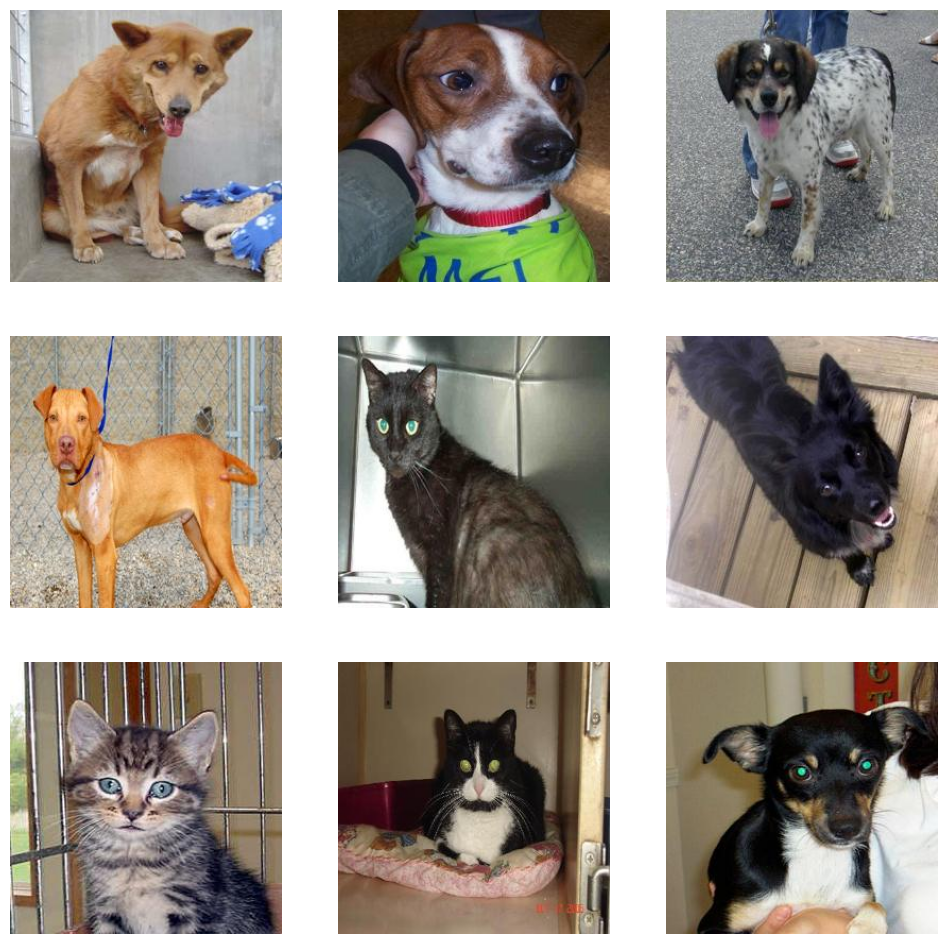

In [6]:
import random
import os
import cv2
import matplotlib.pyplot as plt

# Path to the directory containing images
images_dir = 'E:/PROJECT-AI-ML/Unstop Image Based Recognition/Train Data Set'

# Define paths to 'cats' and 'dogs' subdirectories
cats_dir = os.path.join(images_dir, 'cats')
dogs_dir = os.path.join(images_dir, 'dogs')

# List image files from both directories
image_files = []
for subdir in [cats_dir, dogs_dir]:
    image_files.extend([os.path.join(subdir, f) for f in os.listdir(subdir) if f.lower().endswith(('.jpg', '.jpeg'))])

# Debugging output
print(f"Number of image files found: {len(image_files)}")
print(f"Sample image files: {random.sample(image_files, 5)}")  # Randomly select 5 images for display

# Plotting 9 random images if there are files available
if image_files:
    plt.figure(figsize=(12, 12))
    random_images = random.sample(image_files, 9)  # Randomly select 9 images
    
    for i, image_path in enumerate(random_images):
        # Load and process the image
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
        
        # Display the image in a 3x3 grid
        plt.subplot(331 + i)
        plt.imshow(img)
        plt.axis('off')
    
    # Show the plot with 9 random images
    plt.show()
else:
    print("No image files found in the directory.")

In [2]:
#2. Define the CNN Model

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
cnn = create_model()

C:\Users\Deeya Shalya\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [3]:
#3. Prepare the Data

# Data preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    'E:/PROJECT-AI-ML/Unstop Image Based Recognition/Train Data Set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    'E:/PROJECT-AI-ML/Unstop Image Based Recognition/Test Data Set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
#Train the Model
#Train the CNN model using the training data.

# Train the model
history = cnn.fit(
    train_set,
    epochs=400,  # You can adjust the number of epochs
    validation_data=test_set
)

Epoch 1/400


C:\Users\Deeya Shalya\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.5096 - loss: 0.8588 - val_accuracy: 0.5785 - val_loss: 0.6856
Epoch 2/400
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.5707 - loss: 0.6903 - val_accuracy: 0.6090 - val_loss: 0.6522
Epoch 3/400
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.5842 - loss: 0.6648 - val_accuracy: 0.5897 - val_loss: 0.6629
Epoch 4/400
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.6455 - loss: 0.6183 - val_accuracy: 0.6827 - val_loss: 0.6059
Epoch 5/400
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.6753 - loss: 0.5939 - val_accuracy: 0.7051 - val_loss: 0.5753
Epoch 6/400
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.7143 - loss: 0.5573 - val_accuracy: 0.7131 - val_loss: 0.5574
Epoch 7/400
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.7244 - loss: 0.5563 - val_accuracy: 0.7356 - val_loss: 0.5526
Epoch 8/400
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.7388 - loss: 0.5238 - val_accuracy: 0.7147 - val

In [5]:
#5. Evaluate the model's performance on the test data.
# Evaluate the model on the test set
test_loss, test_accuracy = cnn.evaluate(test_set)
print(f"Test Accuracy: {test_accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7930 - loss: 1.8087
Test Accuracy: 0.7868589758872986


In [7]:
#6. Define the Prediction Function
#Create a function to load and predict the class of an uploaded image.

def load_and_predict(uploaded_image):
    img = Image.open(uploaded_image)
    img = img.resize((64, 64))  # Resize to match the input size of the model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image
    
    # Predict the class
    result = cnn.predict(img_array)
    
    # Display the image and the prediction
    display(img)
    if result[0][0] > 0.5:
        prediction = 'dog'
    else:
        prediction = 'cat'
    
    print(f"Prediction: {prediction}")

FileUpload(value=(), accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


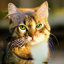

Prediction: dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


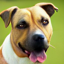

Prediction: dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


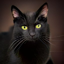

Prediction: cat


In [8]:
# Upload widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)

# On upload event
def on_upload_change(change):
    if uploader.value:
        # Extract file content
        if isinstance(uploader.value, tuple):
            content = uploader.value[0]['content']
        else:
            for filename, file_info in uploader.value.items():
                content = file_info['content']
        
        # Create a BytesIO object from the content
        content_stream = BytesIO(content)
        load_and_predict(content_stream)

# Bind the function to the widget
uploader.observe(on_upload_change, names='value')

# Display the uploader
display(uploader)

In [9]:
from sklearn.metrics import classification_report

# Predict on test set
y_pred = cnn.predict(test_set)
y_pred = (y_pred > 0.5).astype(int)

# Get true labels
y_true = test_set.classes

# Print classification report
print(classification_report(y_true, y_pred, target_names=['cat', 'dog']))

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
              precision    recall  f1-score   support

         cat       0.49      0.42      0.46       312
         dog       0.50      0.57      0.53       312

    accuracy                           0.50       624
   macro avg       0.50      0.50      0.49       624
weighted avg       0.50      0.50      0.49       624



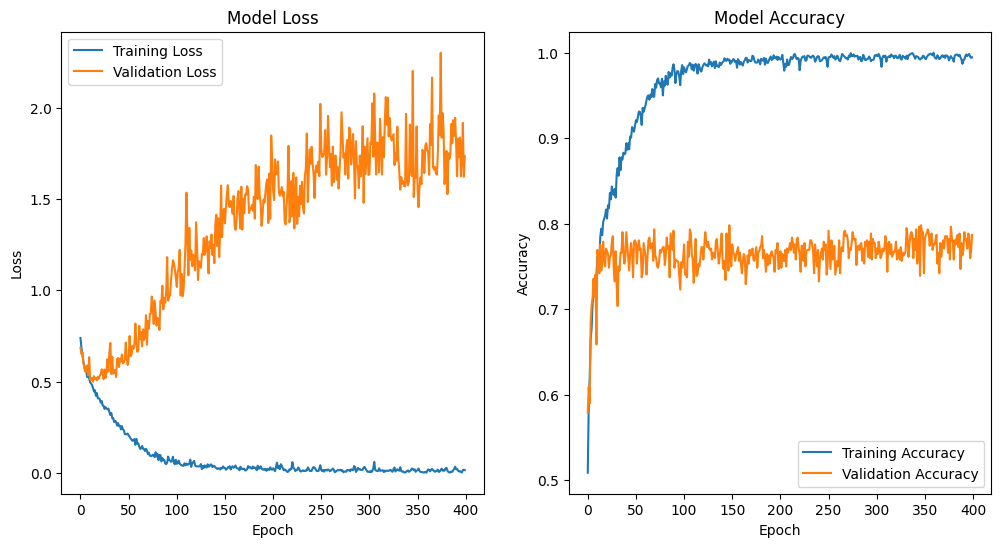

In [11]:
#1. Plot Loss and Accuracy

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


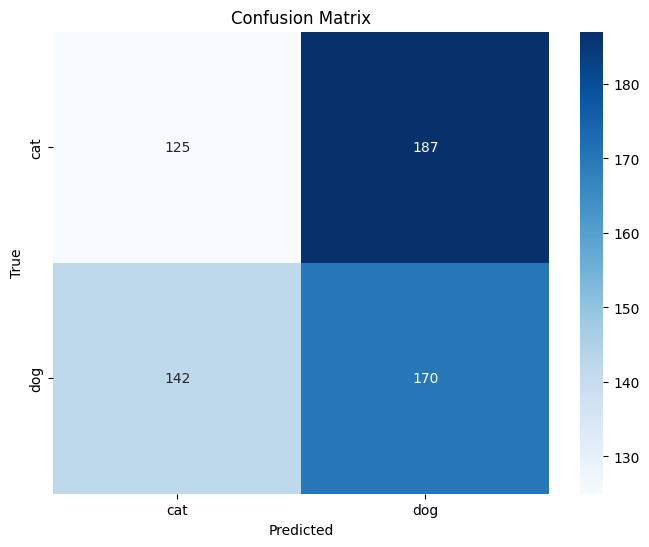

In [12]:
#2. Plot Heatmap & Confusion Matrix

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred = cnn.predict(test_set)
y_pred = (y_pred > 0.5).astype(int)

# Get true labels
y_true = test_set.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['cat', 'dog'], yticklabels=['cat', 'dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

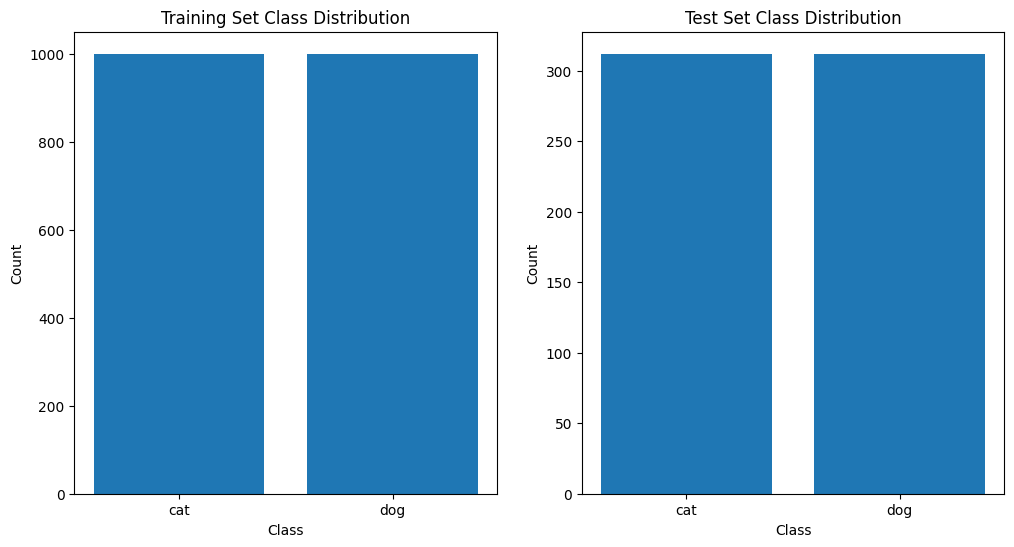

In [14]:
#Class Distribution in Dataset
#Visualize the distribution of classes in the training and test datasets.

import numpy as np
import matplotlib.pyplot as plt

# Calculate class distributions
train_class_counts = np.bincount(train_set.classes)
test_class_counts = np.bincount(test_set.classes)

# Define class labels (assuming binary classification)
class_labels = ['cat', 'dog']

# Plot class distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(class_labels, train_class_counts)
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(class_labels, test_class_counts)
plt.title('Test Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


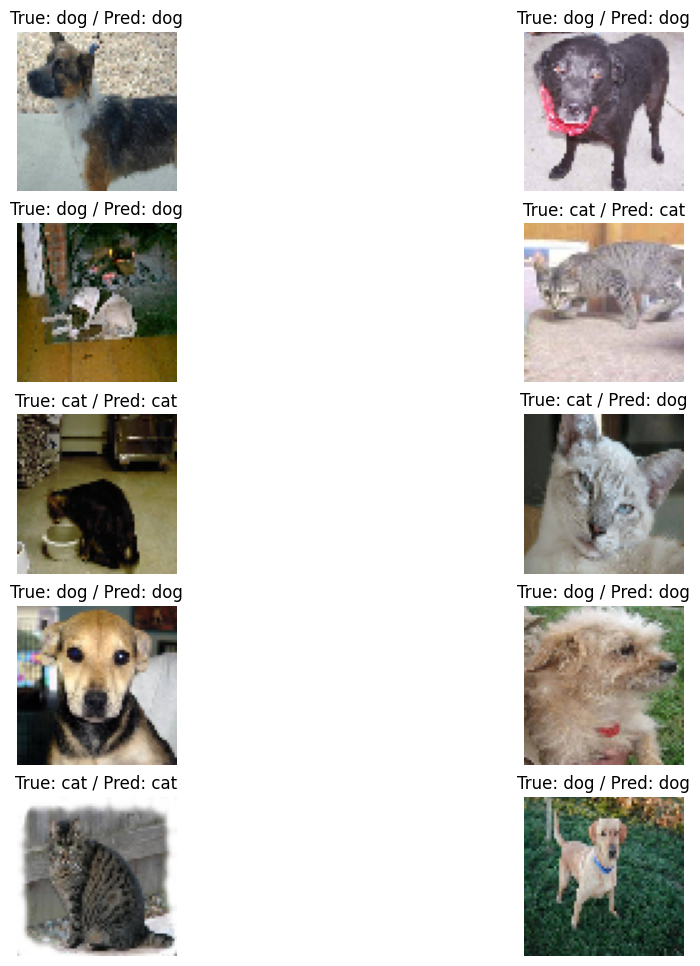

In [15]:
#Sample Predictions
#Visualize some sample predictions along with their true labels.
# Get a batch of images and labels from the test set
images, labels = next(test_set)

# Predict the labels
predictions = cnn.predict(images)
predictions = (predictions > 0.5).astype(int)

plt.figure(figsize=(12, 12))
for i in range(10):  # Display 10 images
    plt.subplot(5, 2, i + 1)
    plt.imshow(images[i])
    plt.title(f"True: {'dog' if labels[i] == 1 else 'cat'} / Pred: {'dog' if predictions[i] == 1 else 'cat'}")
    plt.axis('off')
plt.show()

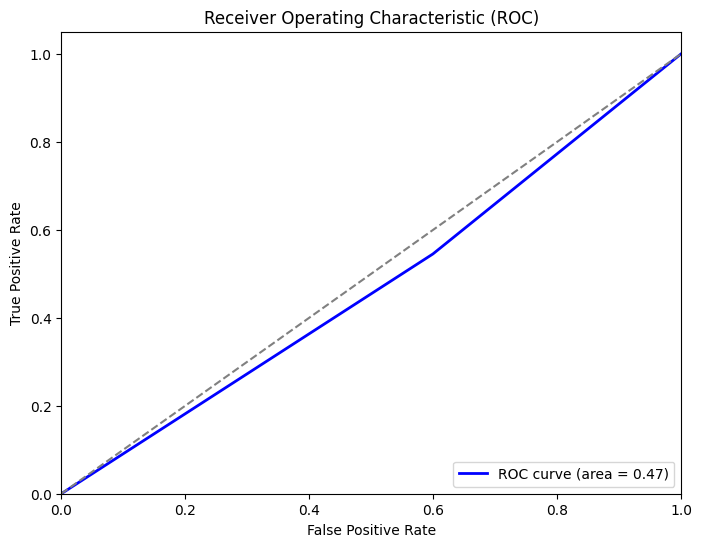

In [16]:
#ROC Curve
#Plot the ROC curve to evaluate the model's performance across different thresholds.

from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

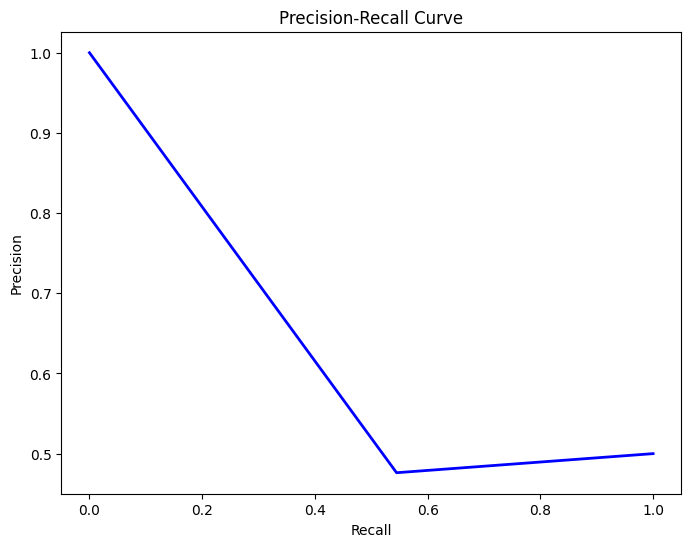

In [17]:
#Precision-Recall Curve
#Plot the precision-recall curve to evaluate the trade-off between precision and recall.

from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


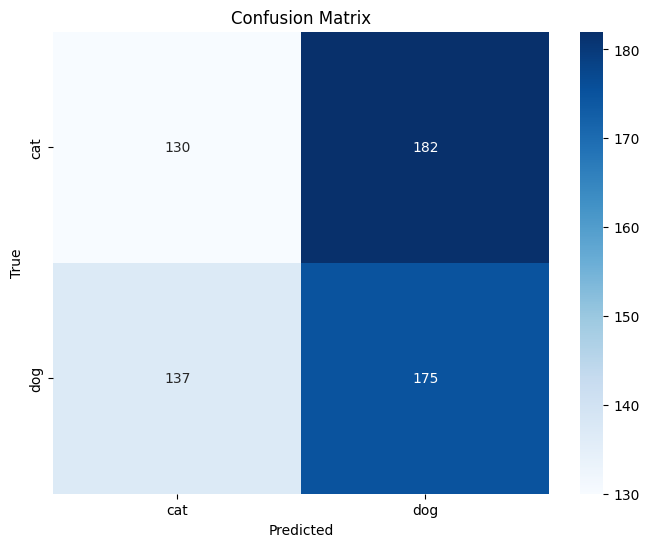

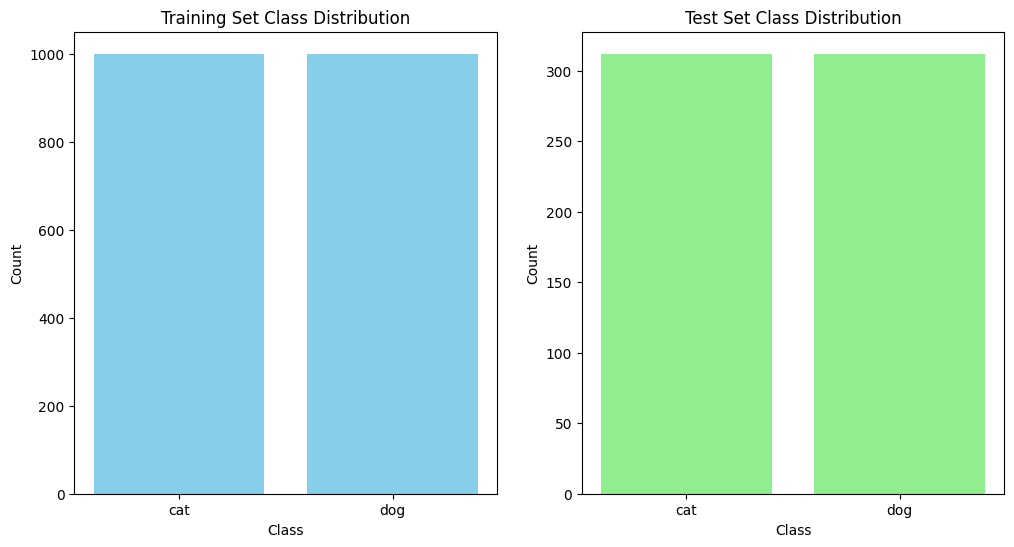

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


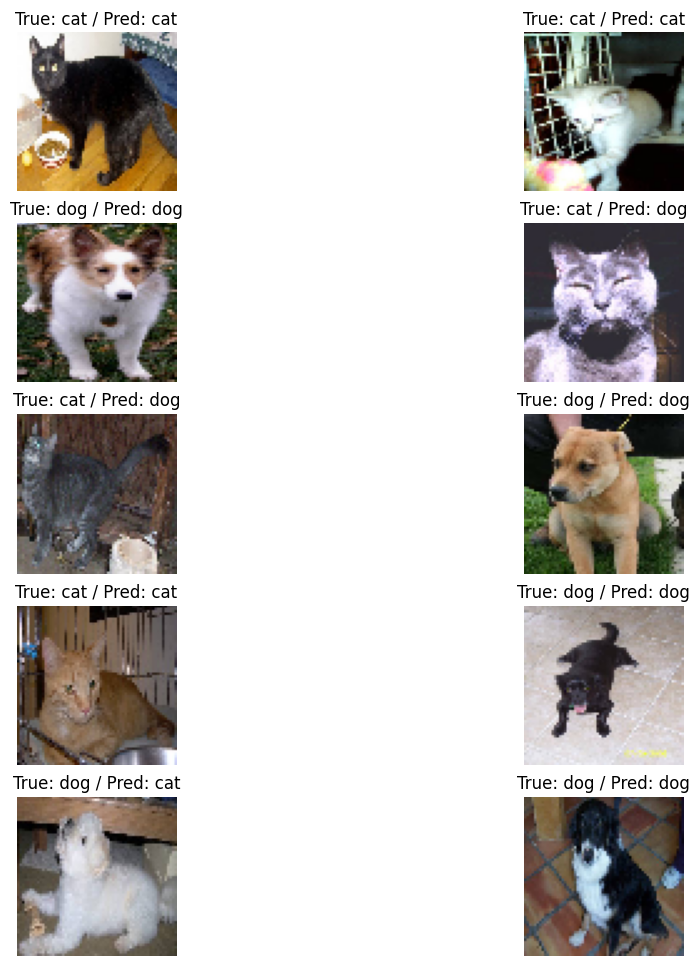

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Predict on test set
y_pred = cnn.predict(test_set)
y_pred = (y_pred > 0.5).astype(int)

# Get true labels
y_true = test_set.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['cat', 'dog'], yticklabels=['cat', 'dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Calculate class distributions
train_class_counts = np.bincount(train_set.classes)
test_class_counts = np.bincount(test_set.classes)

# Define class labels
class_labels = ['cat', 'dog']

# Plot class distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(class_labels, train_class_counts, color='skyblue')
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(class_labels, test_class_counts, color='lightgreen')
plt.title('Test Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

# Get a batch of images and labels from the test set
images, labels = next(test_set)

# Predict the labels
predictions = cnn.predict(images)
predictions = (predictions > 0.5).astype(int)

plt.figure(figsize=(12, 12))
for i in range(10):  # Display 10 images
    plt.subplot(5, 2, i + 1)
    plt.imshow(images[i])
    plt.title(f"True: {'dog' if labels[i] == 1 else 'cat'} / Pred: {'dog' if predictions[i] == 1 else 'cat'}")
    plt.axis('off')
plt.show()

Epoch 1/10


C:\Users\Deeya Shalya\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7030 - loss: 0.6117 - val_accuracy: 0.8300 - val_loss: 0.4702
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8619 - loss: 0.4316 - val_accuracy: 0.8400 - val_loss: 0.3876
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8710 - loss: 0.3535 - val_accuracy: 0.8600 - val_loss: 0.3539
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3346 - val_accuracy: 0.8550 - val_loss: 0.3413
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8715 - loss: 0.3157 - val_accuracy: 0.8600 - val_loss: 0.3316
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9029 - loss: 0.2724 - val_accuracy: 0.8600 - val_loss: 0.3323
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8850 - loss: 0.2755 - val_accuracy: 0.8850 - val_loss: 0.3290
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8865 - loss: 0.2894 - val_accuracy: 0.8700 - val_loss: 0.3307
Epo

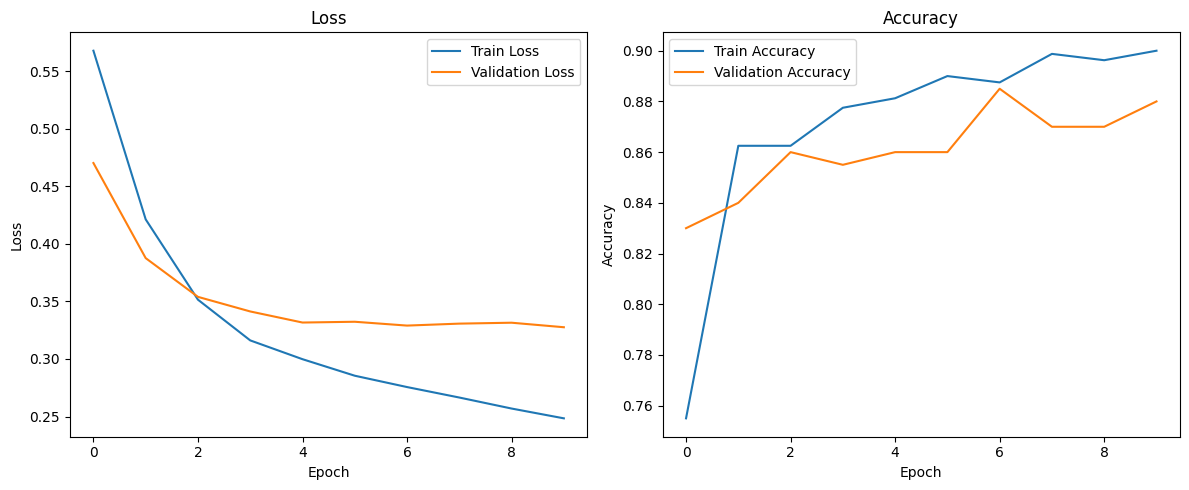

In [29]:
#Learning Curves
#Learning curves show how the model's performance changes over training epochs.

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and get the history
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

def plot_learning_curves(history):
    plt.figure(figsize=(12, 5))

    # Plot training & validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history.get('loss', []), label='Train Loss')
    plt.plot(history.history.get('val_loss', []), label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()

    # Plot training & validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history.get('accuracy', []), label='Train Accuracy')
    plt.plot(history.history.get('val_accuracy', []), label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()

# Plot the learning curves
plot_learning_curves(history)

Found 2000 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10


C:\Users\Deeya Shalya\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.4872 - loss: 0.8408 - val_accuracy: 0.5385 - val_loss: 0.6894
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.5577 - loss: 0.6853 - val_accuracy: 0.6042 - val_loss: 0.6693
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.6169 - loss: 0.6574 - val_accuracy: 0.6442 - val_loss: 0.6519
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.6359 - loss: 0.6256 - val_accuracy: 0.6266 - val_loss: 0.6304
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.6611 - loss: 0.6064 - val_accuracy: 0.5929 - val_loss: 0.6625
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.7127 - loss: 0.5665 - val_accuracy: 0.6939 - val_loss: 0.5991
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.7007 - loss: 0.5663 - val_accuracy: 0.7179 - val_loss: 0.5903
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.7268 - loss: 0.5463 - val_accuracy: 0.7196 - val_loss: 

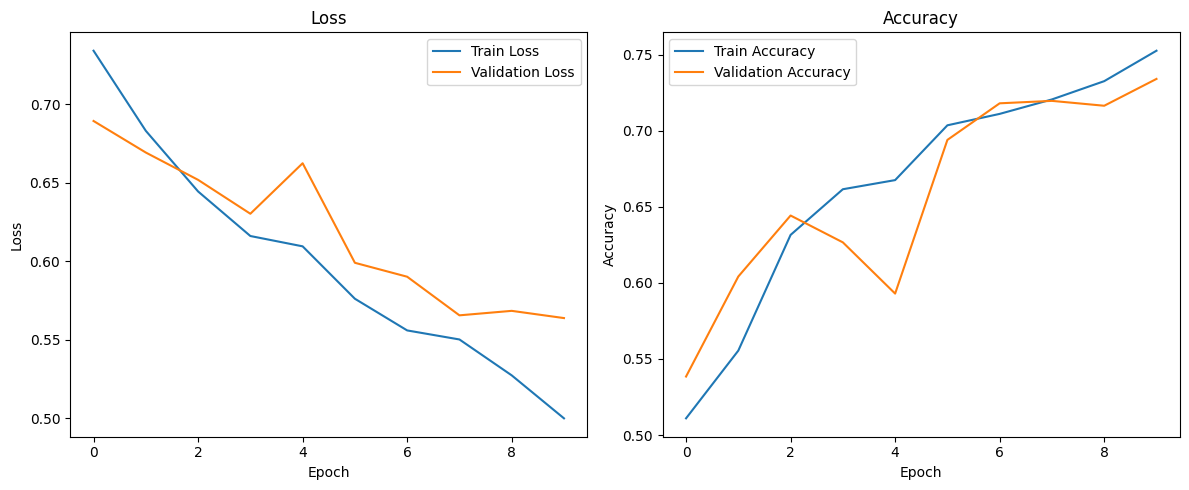

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

# Data preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    'E:/PROJECT-AI-ML/Unstop Image Based Recognition/Train Data Set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    'E:/PROJECT-AI-ML/Unstop Image Based Recognition/Test Data Set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and get the history
history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=10
)

def plot_learning_curves(history):
    plt.figure(figsize=(12, 5))

    # Plot training & validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()

    # Plot training & validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()

# Plot the learning curves
plot_learning_curves(history)
